In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leeeeeeeeeemmmm/lemmatized_tweets.csv


In [2]:
! pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.4 MB/s eta 0:00:0000:0100:01
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14759 sha256=5c6e915bfb4f6fece37ad282c4239dc71199e71bf42d8061c92d5791b430d55e
  Stored in directory: /root/.cache/pip/wheels/03/0b/3f/6ddf

In [3]:
from flair.models import TextClassifier
from flair.data import Sentence

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
classifier = TextClassifier.load('sentiment')

2023-05-23 18:25:46,443 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpxih16g4o


100%|██████████| 253M/253M [00:15<00:00, 16.7MB/s]   

2023-05-23 18:26:02,811 copying /tmp/tmpxih16g4o to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-05-23 18:26:03,017 removing temp file /tmp/tmpxih16g4o


In [5]:
def polarity(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].score

In [7]:
import numpy as np
import pandas as pd


In [8]:
data = pd.read_csv("/kaggle/input/leeeeeeeeeemmmm/lemmatized_tweets.csv")

In [9]:
data.head()

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5


In [10]:
data['text'] = data['text'].astype(str)

In [12]:
from tqdm import tqdm

In [31]:
arr = data['text'].apply(polarity)

Sentiment Analysis:   0%|          | 0/5 [16:40<?, ?it/s]


In [32]:
arr

0         0.913472
1         0.897527
2         0.999980
3         0.644707
4         0.944753
            ...   
468731    0.998606
468732    0.532623
468733    0.973466
468734    0.998895
468735    0.995102
Name: text, Length: 468736, dtype: float64

In [33]:
data['sentiment_score'] = arr

In [34]:
data

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts,sentiment_score
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1,0.913472
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2,0.897527
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3,0.999980
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4,0.644707
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5,0.944753
...,...,...,...,...,...,...,...,...
468731,468731,474293,19340103,2019-11-23,xmr worth btc,Positive,246,0.998606
468732,468732,474294,19340104,2019-11-23,eurjpy usdjpy spx usdtry eurusd gbpusd usdjpy ...,Positive,247,0.532623
468733,468733,474295,19340105,2019-11-23,beautiful close yesterday weekly front ran clo...,Positive,248,0.973466
468734,468734,474296,19340106,2019-11-23,one bitcoin biggest holder moved btc worth mil...,Positive,249,0.998895


In [43]:
date = []
polarity = []

sumof = -100
count = 0

for i in range(468735):
    if data['Date'][i] == data['Date'][i+1]:
#         sumof = max(sumof, data['sentiment_score'][i])
        sumof += data['sentiment_score'][i]
        count += 1
    
    else:
        sumof = sumof/count
        date.append(data['Date'][i])
        polarity.append(sumof)
        sumof = 0
        count = 0
        

In [44]:
df = pd.DataFrame({'Date': date, 'Polarity': polarity})

In [45]:
df

,Date,Polarity
0,2019-05-27,0.475335
1,2019-05-21,0.905643
2,2019-05-22,0.898526
3,2019-05-10,0.897957
4,2019-05-26,0.899099
...,...,...
1887,2019-11-18,0.925904
1888,2019-11-19,0.912254
1889,2019-11-20,0.921770
1890,2019-11-21,0.909948


In [46]:
sorted_df = df.sort_values(by='Date')

In [47]:
sorted_df

,Date,Polarity
1256,2014-09-18,0.892754
1257,2014-09-19,0.894081
550,2014-09-20,0.902792
549,2014-09-21,0.893301
1259,2014-09-22,0.908317
...,...,...
1887,2019-11-18,0.925904
1888,2019-11-19,0.912254
1889,2019-11-20,0.921770
1890,2019-11-21,0.909948


In [48]:
sorted_df = sorted_df.reset_index()

In [49]:
sorted_df.head(50)

,index,Date,Polarity
0,1256,2014-09-18,0.892754
1,1257,2014-09-19,0.894081
2,550,2014-09-20,0.902792
3,549,2014-09-21,0.893301
4,1259,2014-09-22,0.908317
5,1258,2014-09-23,0.889108
6,552,2014-09-24,0.893436
7,553,2014-09-25,0.886185
8,1260,2014-09-26,0.889971
9,551,2014-09-27,0.897547


In [50]:
sorted_df = sorted_df.drop('index', axis = 1)

In [51]:
sorted_df

,Date,Polarity
0,2014-09-18,0.892754
1,2014-09-19,0.894081
2,2014-09-20,0.902792
3,2014-09-21,0.893301
4,2014-09-22,0.908317
...,...,...
1887,2019-11-18,0.925904
1888,2019-11-19,0.912254
1889,2019-11-20,0.921770
1890,2019-11-21,0.909948


In [52]:
btc_data = pd.read_csv("/kaggle/input/biiiiiiiiiiiiiiiiiiiiiit/BTC-USD (4) (3).csv")

In [53]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [54]:
for i in range(1894,3102,1):
    btc_data = btc_data.drop(index = i)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)


In [56]:
btc_data.iloc[:, 1:5]

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
1889,8305.134766,8408.516602,8099.963379,8206.145508
1890,8203.613281,8237.240234,8010.511719,8027.268066
1891,8023.644531,8110.098145,7597.381836,7642.750000
1892,7643.569336,7697.382813,6936.706543,7296.577637


In [57]:
pca.fit(btc_data.iloc[:, 1:5])

PCA(n_components=1)

In [58]:
x_pca = pca.transform(btc_data.iloc[:, 1:5])

In [59]:
pca_df = pd.DataFrame(btc_data['Date'])

In [60]:
pca_df['pca'] = x_pca

In [61]:
pca_df

,Date,pca
0,2014-09-17,-6455.151675
1,2014-09-18,-6500.882317
2,2014-09-19,-6560.872875
3,2014-09-20,-6568.316548
4,2014-09-21,-6570.690162
...,...,...
1889,2019-11-19,9132.934366
1890,2019-11-20,8860.941926
1891,2019-11-21,8313.961997
1892,2019-11-22,7419.262696


In [62]:
price = []
for i in range(1892):
    for j in range(1894):
        if(pca_df['Date'][j] == sorted_df['Date'][i]):
            price.append(pca_df['pca'][j])
            

In [63]:
len(price)

1892

In [64]:
sorted_df['pca'] = price

In [65]:
sorted_df.head()

,Date,Polarity,pca
0,2014-09-18,0.892754,-6500.882317
1,2014-09-19,0.894081,-6560.872875
2,2014-09-20,0.902792,-6568.316548
3,2014-09-21,0.893301,-6570.690162
4,2014-09-22,0.908317,-6574.472292


In [66]:
import  matplotlib.pyplot as plt

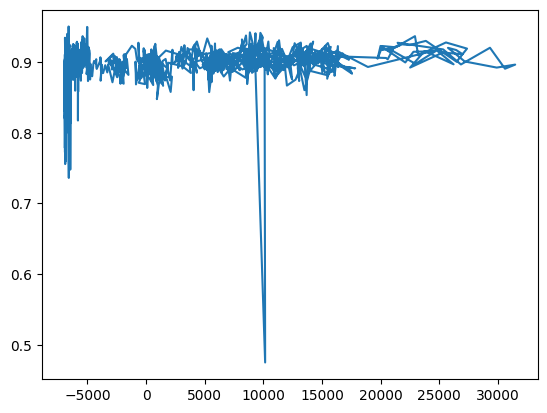

In [67]:
plt.plot(sorted_df['pca'], sorted_df['Polarity'])

In [68]:
x = sorted_df['pca']
y = sorted_df['Polarity']

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x =  scaler.fit_transform(np.array(x).reshape(-1,1))
y =  scaler.fit_transform(np.array(y).reshape(-1,1))

In [70]:
x

array([[0.01245741],
       [0.01089717],
       [0.01070357],
       ...,
       [0.41198823],
       [0.39776236],
       [0.37449299]])

In [71]:
y

array([[0.87920913],
       [0.88200552],
       [0.90035223],
       ...,
       [0.94032703],
       [0.91542608],
       [0.92061029]])

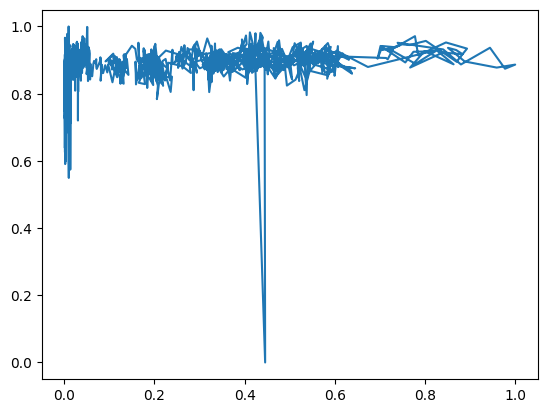

In [72]:
plt.plot(x,y)

In [73]:
x.shape

(1892, 1)

In [74]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [75]:
x.shape

(1892, 1, 1)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [79]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (1,1)))
model.add(LSTM(75, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 1, 75)             52800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                25200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 118,851
Trainable params: 118,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=200, batch_size=25, verbose=1)

Epoch 1/200
61/61 [==============================] - 9s 26ms/step - loss: 0.3621 - val_loss: 0.0159
Epoch 2/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0110 - val_loss: 0.0056
Epoch 3/200
61/61 [==============================] - 1s 11ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 4/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 5/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 7/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 

In [82]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

12/12 [==============================] - 0s 3ms/step


In [83]:
import math
from sklearn.metrics import mean_squared_error

In [84]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.05416454210541383

In [86]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.05237288768840224

In [87]:
polarity_imputed = pd.DataFrame({'Date': btc_data['Date']})

In [88]:
polarity_imputed

,Date
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
1889,2019-11-19
1890,2019-11-20
1891,2019-11-21
1892,2019-11-22


In [89]:
polarity_imputed['Polarity'] = np.nan

In [90]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,NaN
2,2014-09-19,NaN
3,2014-09-20,NaN
4,2014-09-21,NaN
...,...,...
1889,2019-11-19,NaN
1890,2019-11-20,NaN
1891,2019-11-21,NaN
1892,2019-11-22,NaN


In [91]:
for i in range(1894):
    for j in range(1892):
        if polarity_imputed['Date'][i] == sorted_df['Date'][j]:
            polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]

/tmp/ipykernel_31/417148334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]


In [92]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,0.892754
2,2014-09-19,0.894081
3,2014-09-20,0.902792
4,2014-09-21,0.893301
...,...,...
1889,2019-11-19,0.912254
1890,2019-11-20,0.921770
1891,2019-11-21,0.909948
1892,2019-11-22,0.912409


In [93]:
polarity_imputed['Close'] = pca_df['pca']

In [94]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,NaN,-6455.151675
1,2014-09-18,0.892754,-6500.882317
2,2014-09-19,0.894081,-6560.872875
3,2014-09-20,0.902792,-6568.316548
4,2014-09-21,0.893301,-6570.690162
...,...,...,...
1889,2019-11-19,0.912254,9132.934366
1890,2019-11-20,0.921770,8860.941926
1891,2019-11-21,0.909948,8313.961997
1892,2019-11-22,0.912409,7419.262696


In [95]:
arr = []
arr.append(polarity_imputed['Close'][0])
arr.append(polarity_imputed['Close'][1893])

In [96]:
arr

[-6455.151674501617, 7267.2655850713645]

In [97]:
arr = np.array(arr)

In [104]:
arr =  scaler.fit_transform(np.array(arr).reshape(-1,1))


In [105]:
arr = arr.reshape(arr.shape[0], 1, 1)

In [106]:
arr.shape

(2, 1, 1)

In [107]:
predicted = model.predict(arr)

1/1 [==============================] - 0s 23ms/step


In [108]:
predicted

array([[0.8575304],
       [0.9040301]], dtype=float32)

In [109]:
polarity_imputed['Polarity'][0] = predicted[0]
polarity_imputed['Polarity'][1893] = predicted[1]


/tmp/ipykernel_31/2319400452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][0] = predicted[0]
/tmp/ipykernel_31/2319400452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][1893] = predicted[1]


In [110]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,0.857530,-6455.151675
1,2014-09-18,0.892754,-6500.882317
2,2014-09-19,0.894081,-6560.872875
3,2014-09-20,0.902792,-6568.316548
4,2014-09-21,0.893301,-6570.690162
...,...,...,...
1889,2019-11-19,0.912254,9132.934366
1890,2019-11-20,0.921770,8860.941926
1891,2019-11-21,0.909948,8313.961997
1892,2019-11-22,0.912409,7419.262696


In [144]:
polarity_imputed.isna().sum().sum()

0

In [145]:
df = polarity_imputed['Close']

In [146]:
df.head()

0   -6455.151675
1   -6500.882317
2   -6560.872875
3   -6568.316548
4   -6570.690162
Name: Close, dtype: float64

In [147]:
bit_data = []
for i in range(10):
    bit_data.append(df[i])
    
for i in range(10,len(df)):
    sumof = 0
    for j in range(1,11,1):
        sumof += df[i-j]
    bit_data.append(sumof/10)

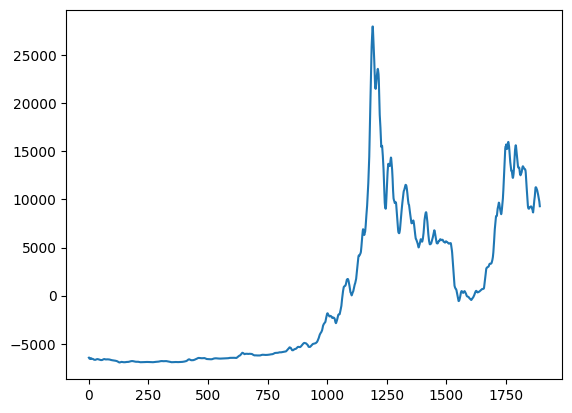

In [148]:
plt.plot(bit_data)

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
bit_data =  scaler.fit_transform(np.array(bit_data).reshape(-1,1))
bit_data =  scaler.fit_transform(np.array(df).reshape(-1,1))

In [150]:
bit_data

array([[0.01364677],
       [0.01245741],
       [0.01089717],
       ...,
       [0.39776236],
       [0.37449299],
       [0.37053984]])

In [151]:
bit_data.shape

(1894, 1)

In [152]:
# splitting the data set into train and test data
training_size = int(len(bit_data)*0.80)
test_size = len(bit_data) - training_size
train_data, test_data = bit_data[:training_size,:], bit_data[training_size:len(bit_data),:1]

In [153]:
# creating data set for LSTM model, for each output data the 100 days back prices are considered as features
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [154]:
time_step = 50
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [155]:
x_train

array([[0.01364677, 0.01245741, 0.01089717, ..., 0.00673791, 0.00676177,
        0.00715094],
       [0.01245741, 0.01089717, 0.01070357, ..., 0.00676177, 0.00715094,
        0.00761876],
       [0.01089717, 0.01070357, 0.01064184, ..., 0.00715094, 0.00761876,
        0.00770287],
       ...,
       [0.32250432, 0.31864515, 0.32033141, ..., 0.3210709 , 0.32022955,
        0.32287306],
       [0.31864515, 0.32033141, 0.32569308, ..., 0.32022955, 0.32287306,
        0.32464719],
       [0.32033141, 0.32569308, 0.33481595, ..., 0.32287306, 0.32464719,
        0.32794898]])

In [156]:
x_train.shape

(1464, 50)

In [183]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [185]:
model = Sequential()
model.add(LSTM(107, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(73, return_sequences = True))
# model.add(LSTM(47, return_sequences = True))
model.add(LSTM(47))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [186]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 50, 107)           46652     
                                                                 
 lstm_36 (LSTM)              (None, 50, 73)            52852     
                                                                 
 lstm_37 (LSTM)              (None, 47)                22748     
                                                                 
 dense_9 (Dense)             (None, 1)                 48        
                                                                 
Total params: 122,300
Trainable params: 122,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
59/59 [==============================] - 7s 30ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 2/100
59/59 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 3/100
59/59 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/100
59/59 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
59/59 [==============================] - 1s 13ms/step - loss: 9.6234e-04 - val_loss: 0.0013
Epoch 6/100
59/59 [==============================] - 1s 13ms/step - loss: 7.9857e-04 - val_loss: 8.3731e-04
Epoch 7/100
59/59 [==============================] - 1s 13ms/step - loss: 6.5323e-04 - val_loss: 0.0019
Epoch 8/100
59/59 [==============================] - 1s 13ms/step - loss: 8.3349e-04 - val_loss: 0.0017
Epoch 9/100
59/59 [==============================] - 1s 13ms/step - loss: 6.6002e-04 - val_loss: 6.9126e-04
Epoch 10/100
59/59 [==============================] - 1s 13ms/step - los

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [168]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.009140952826298865

In [169]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.011538225690058773

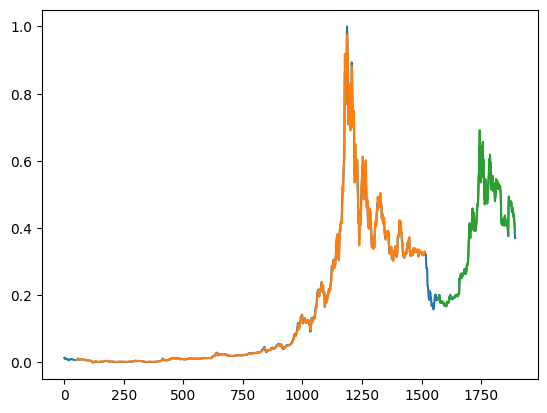

In [170]:
# plotting train predictions
look_back = 50
train_predict_plot = np.empty_like(bit_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(bit_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict
# plotting baselines and predictions
plt.plot(bit_data)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [171]:
X_train = []
for i in range(1464):
    X = np.append(x_train[i], polarity_imputed['Polarity'][i])
    X_train.append(X)
    

In [172]:
X_test = []
for i in range(328):
    X = np.append(x_test[i], polarity_imputed['Polarity'][i+1464])
    X_test.append(X)

In [173]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [174]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [176]:
model = Sequential()
model.add(LSTM(107, return_sequences = True, input_shape = (51,1)))
model.add(LSTM(73, return_sequences = True))
model.add(LSTM(47, return_sequences = True))
model.add(LSTM(47))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [177]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 51, 107)           46652     
                                                                 
 lstm_28 (LSTM)              (None, 51, 73)            52852     
                                                                 
 lstm_29 (LSTM)              (None, 51, 47)            22748     
                                                                 
 lstm_30 (LSTM)              (None, 47)                17860     
                                                                 
 dense_7 (Dense)             (None, 1)                 48        
                                                                 
Total params: 140,160
Trainable params: 140,160
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
59/59 [==============================] - 9s 38ms/step - loss: 0.0058 - val_loss: 0.0107
Epoch 2/100
59/59 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/100
59/59 [==============================] - 1s 16ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 5/100
59/59 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
59/59 [==============================] - 1s 16ms/step - loss: 7.8256e-04 - val_loss: 8.2717e-04
Epoch 7/100
59/59 [==============================] - 1s 16ms/step - loss: 8.5491e-04 - val_loss: 7.6903e-04
Epoch 8/100
59/59 [==============================] - 1s 18ms/step - loss: 6.2785e-04 - val_loss: 0.0031
Epoch 9/100
59/59 [==============================] - 1s 16ms/step - loss: 5.9567e-04 - val_loss: 0.0011
Epoch 10/100
59/59 [==============================] - 1s 16ms/step - loss: 5

In [179]:
train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)

11/11 [==============================] - 0s 5ms/step


In [180]:
math.sqrt(mean_squared_error(y_train, train_predict1))

0.014476146645102217

In [181]:
math.sqrt(mean_squared_error(y_test, test_predict1))

0.018663505315827646

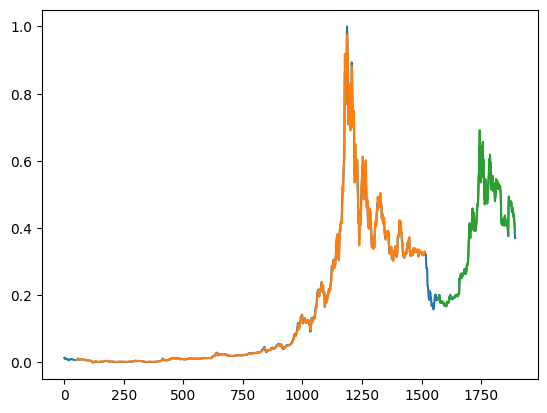

In [182]:
# plotting train predictions
look_back = 50
train_predict_plot = np.empty_like(bit_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(bit_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict
# plotting baselines and predictions
plt.plot(bit_data)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()